<a href="https://colab.research.google.com/github/Nik211885/Hello_HTML5/blob/colab/tourl_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing as sklp
from imblearn.over_sampling import RandomOverSampler

In [ ]:
df = pd.read_csv('./water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
for label in (df.columns[:-1]):
  plt.hist(df[df['Potability'] == 1][label],color = 'blue',label='Good',density = True,alpha = 0.7)
  plt.hist(df[df['Potability'] == 0][label],color = 'red',label='Not Good',density = True,alpha = 0.7)
  plt.title(label)
  plt.legend()
  plt.show()

In [ ]:
df.fillna(df.mean(), inplace=True)
train, valid, test = np.split(df.sample(frac = 1),[int(0.6 * len(df)), int(0.8 * len(df))])

In [ ]:
def scale_data(dataframe, over=1):
  X = df[df.columns[:-1]].values
  Y = df[df.columns[-1]].values
  if(over):
    r = RandomOverSampler()
    X,Y = r.fit_resample(X,Y)
  scaler = sklp.StandardScaler()
  X = scaler.fit_transform(X)

  data = np.hstack((X,np.reshape(Y,(len(X),1))))

  return data,X,Y

In [ ]:
data_train, X_train, Y_train = scale_data(train)

data_valid, X_valid, Y_valid = scale_data(valid,0)

data_test, X_test, Y_test = scale_data(test,0)

# KNN

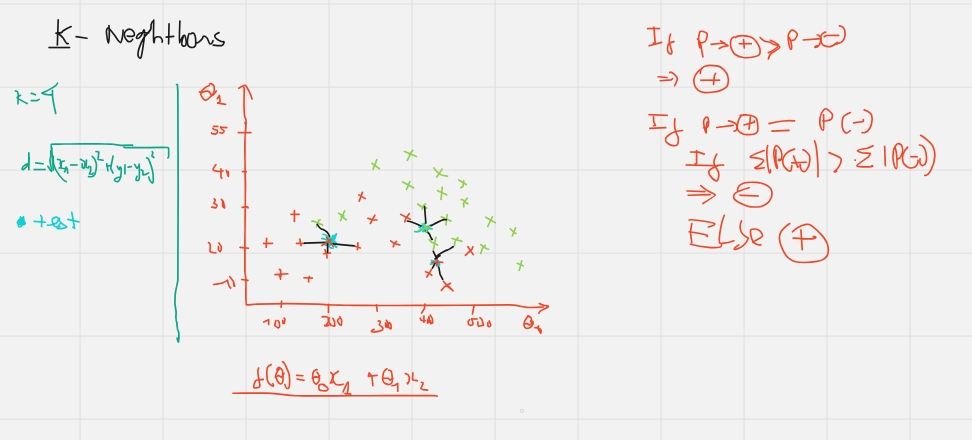

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
def set_k_kneifhbors(k):
  knn_model = KNeighborsClassifier(n_neighbors = k)

  knn_model.fit(X_train,Y_train)

  return knn_model

In [ ]:
knn_model = set_k_kneifhbors(3)
Y_pred = knn_model.predict(X_test)
print(Y_pred)
print(Y_test)

[1 0 0 ... 0 1 1]
[0 0 0 ... 1 1 1]


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84      1998
           1       0.72      0.82      0.77      1278

    accuracy                           0.81      3276
   macro avg       0.80      0.81      0.80      3276
weighted avg       0.82      0.81      0.81      3276



In [ ]:
print(accuracy_score(Y_test,Y_pred))

0.8083028083028083


In [ ]:
knn = np.arange(1,11,1)
acc_score = []
for k in knn:
  knn_model = set_k_kneifhbors(k)
  y_pred = knn_model.predict(X_test)
  acc_score.append(accuracy_score(Y_test,y_pred))

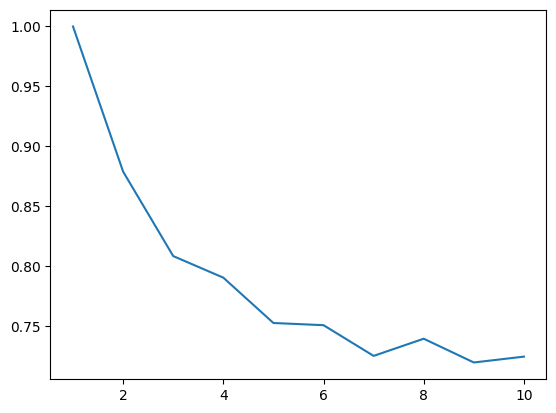

In [ ]:
acc_score = np.array(acc_score)
plt.plot(knn,acc_score)
plt.show()

# NAIVE BAYES

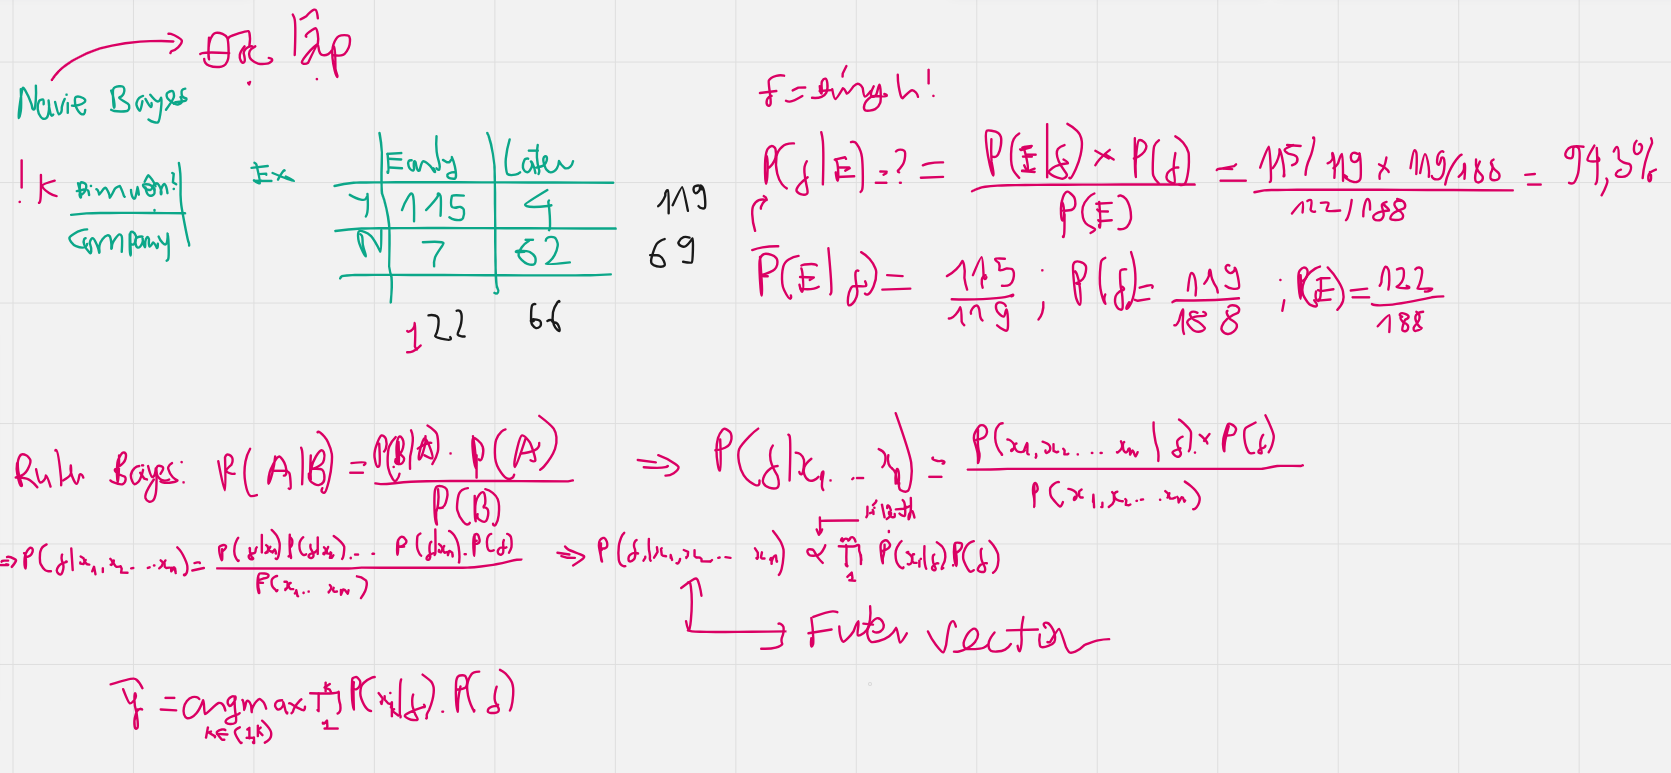

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      1998
           1       0.48      0.45      0.46      1278

    accuracy                           0.59      3276
   macro avg       0.57      0.57      0.57      3276
weighted avg       0.59      0.59      0.59      3276



#Logistic Regrission

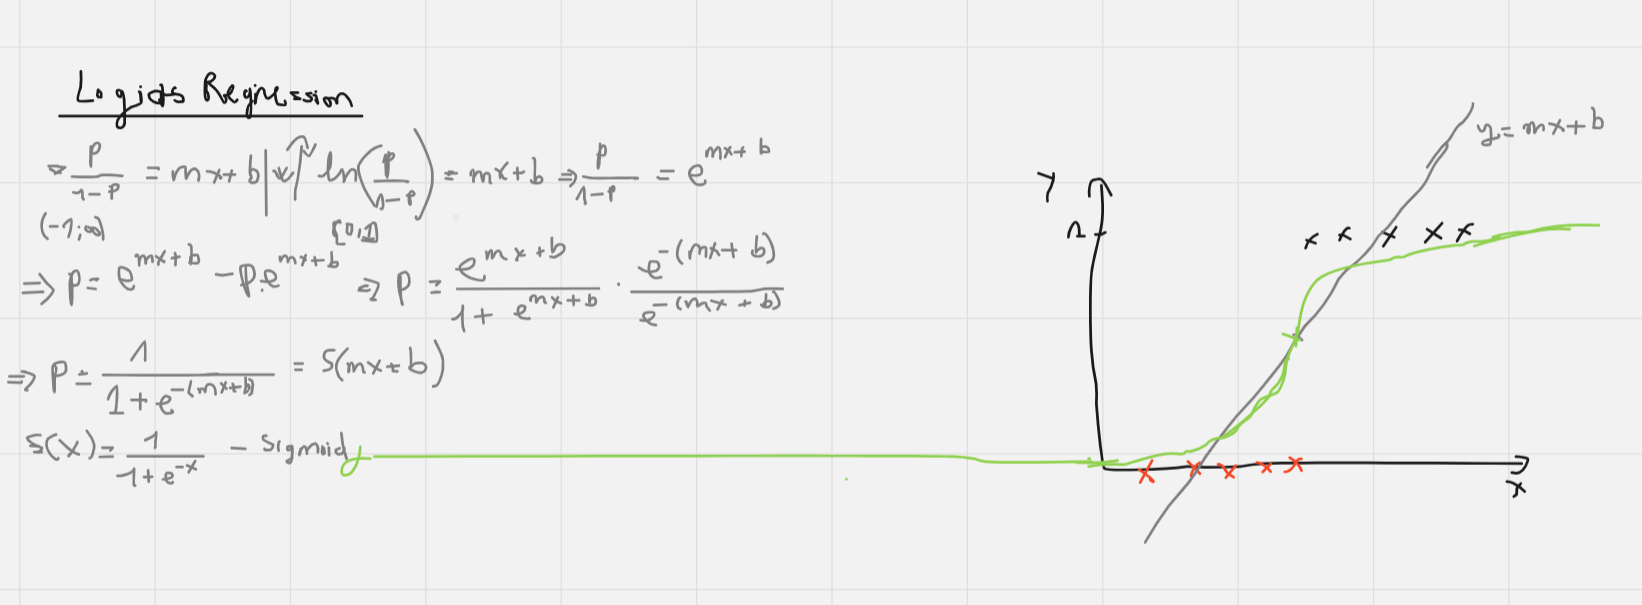

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_model = LogisticRegression(penalty='l2')
logistic_model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.63      0.52      0.57      1998
           1       0.41      0.52      0.46      1278

    accuracy                           0.52      3276
   macro avg       0.52      0.52      0.51      3276
weighted avg       0.54      0.52      0.53      3276



#Support Vector MachineLearning(SVM)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC(kernel='rbf',gamma=0.8)

In [ ]:
svm_model.fit(X_train,Y_train)

SVC(gamma=0.8)

In [ ]:
y_pred = svm_model.predict(X_test)

In [ ]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1998
           1       0.97      0.96      0.97      1278

    accuracy                           0.97      3276
   macro avg       0.97      0.97      0.97      3276
weighted avg       0.97      0.97      0.97      3276

